In [11]:
import h5py
import gc
from glob import glob
from matplotlib import pylab as plt
import cv2
from skimage import exposure


In [2]:
import tensorflow as tf

In [5]:
dataset = h5py.File('train.h5', 'r')
X = dataset["x"]
y = dataset["y"]

X.shape, y.shape

((9245, 256, 256, 6), (9245, 256, 256, 6))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

os.makedirs('input', exist_ok=True)
os.makedirs('output', exist_ok=True)



In [12]:
def contrast(image):
    for band_idx in range(image.shape[-1]):
        band_data = image[:,:,band_idx]
        valid_data = band_data[np.logical_and(band_data != np.inf, band_data != -np.inf)]
        in_low, in_high = np.percentile(valid_data, (2, 98))
        
        band_data = exposure.rescale_intensity(band_data, in_range=(in_low, in_high))
        image[:,:,band_idx] = band_data
        
    return image

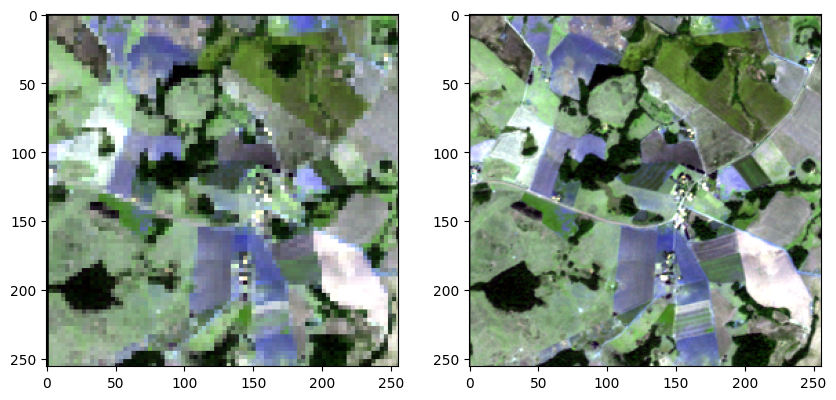

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].imshow(contrast(X[0][:,:, :3] / 10000))
axs[1].imshow(contrast(y[0][:,:, :3] / 10000))

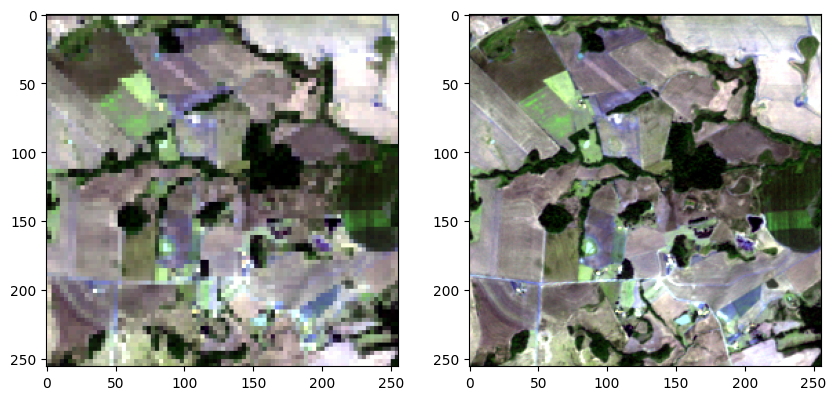

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].imshow(contrast(X[1][:,:, :3] / 10000))
axs[1].imshow(contrast(y[1][:,:, :3] / 10000))

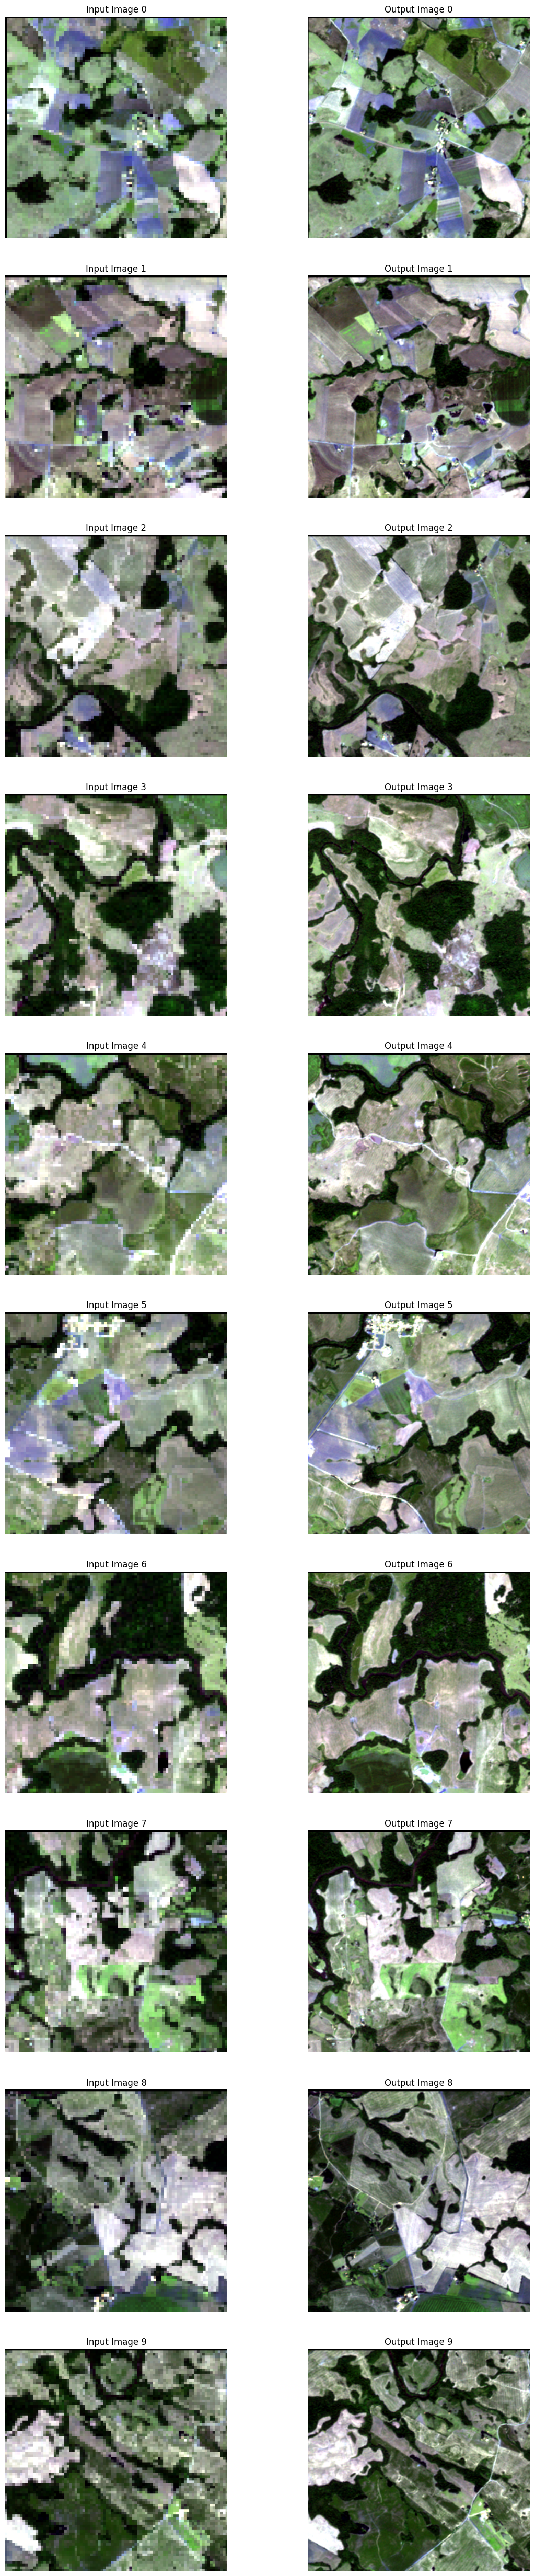

Saved 10 image pairs to 'input' and 'output' directories


In [16]:
# Save images to input and output directories and show 10 samples
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Create directories if they don't exist
import os
os.makedirs('input', exist_ok=True)
os.makedirs('output', exist_ok=True)

# Function to convert normalized array to PIL Image
def array_to_pil(img_array):
    # Apply contrast enhancement
    img_array = contrast(img_array[:,:,:3] / 10000)
    
    # Convert to uint8 format (0-255)
    img_array = (img_array * 255).astype(np.uint8)
    
    # Create PIL image
    img = Image.fromarray(img_array)
    return img

# Sample size to display
num_samples = 10

# Create a figure to show sample images
fig, axs = plt.subplots(num_samples, 2, figsize=(12, 5*num_samples))
fig.tight_layout(pad=3.0)

# Save the first num_samples pairs and display them
for i in range(num_samples):
    # Process and save input image
    input_img = array_to_pil(X[i])
    input_img.save(f'input/image_{i:04d}.jpg')
    
    # Process and save output/target image
    output_img = array_to_pil(y[i])
    output_img.save(f'output/image_{i:04d}.jpg')
    
    # Display samples
    axs[i, 0].imshow(input_img)
    axs[i, 0].set_title(f'Input Image {i}')
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(output_img)
    axs[i, 1].set_title(f'Output Image {i}')
    axs[i, 1].axis('off')

plt.show()

print(f"Saved {num_samples} image pairs to 'input' and 'output' directories")